In [16]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict

In [17]:
#https://data.wprdc.org/dataset/city-of-pittsburgh-speed-humps
df = pd.read_csv("Data.csv")

# Add new 'Value' column with all 1's
df['Value'] = 1

# Group rows by ID label and sum values within each group
grouped = defaultdict(int)
for idx, row in df.iterrows():
    grouped[row['neighborhood']] += row['Value']

# Convert dictionary to DataFrame
result = pd.DataFrame({'neighborhood': list(grouped.keys()), 'Sum': list(grouped.values())})
print(result)

           neighborhood  Sum
0   Squirrel Hill South   18
1         North Oakland    6
2             Brookline    4
3            Bloomfield    3
4           Polish Hill    6
5        Homewood South    4
6      Mount Washington    3
7      South Side Flats    3
8       Central Oakland    1
9   Squirrel Hill North    3
10           Upper Hill    4
11        Highland Park    2
12              Carrick    9
13          Perry North    4
14    South Side Slopes    4
15             Garfield    3
16      Stanton Heights    1
17            Overbrook    1


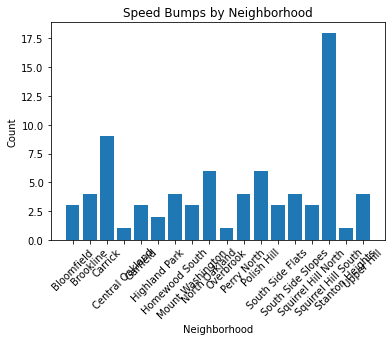

In [22]:
# Group rows by neighborhood and count occurrences within each group
grouped = df.groupby('neighborhood').count()

# Create bar graph
plt.bar(grouped.index, grouped['Value'])

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Speed Bumps by Neighborhood')

# Add labels to the bars
for i, v in enumerate(grouped['Value']):
    ax.text(i, v+0.1, str(v), ha='center')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the graph
plt.show()

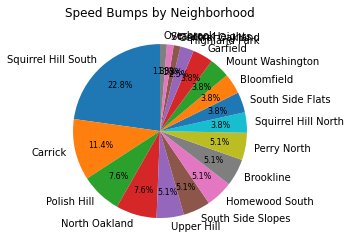

In [19]:
# Group rows by neighborhood and count occurrences within each group
grouped = df.groupby('neighborhood').count()

# Sort groups by count in descending order
grouped = grouped.sort_values('Value', ascending=False)

# Create pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(grouped['Value'], labels=grouped.index, autopct='%1.1f%%', 
                                  labeldistance=1.1, pctdistance=0.7, startangle=90)

# Adjust the size of the chart and the distance of the labels from the center of the chart
plt.setp(autotexts, size=8)
ax.set_title('Speed Bumps by Neighborhood')


# Show the chart
plt.show()

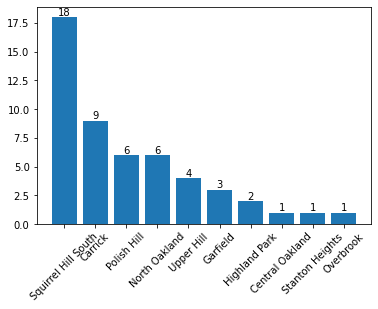

In [20]:
# Group the DataFrame by neighborhood and count the number of occurrences
df_grouped = df.groupby('neighborhood').size().reset_index(name='count')

# Sort the DataFrame by the count of occurrences
df_sorted = df_grouped.sort_values(by='count', ascending=False)

# Extract the top and bottom 3 values
top_3 = df_sorted[:5]
bottom_3 = df_sorted[-5:]

# Concatenate the top and bottom 3 values
df_plot = pd.concat([top_3, bottom_3])

# Plot the bar graph
plt.bar(df_plot['neighborhood'], df_plot['count'])

# Add labels to the bars
for index, row in df_plot.iterrows():
    plt.text(row['neighborhood'], row['count'], str(row['count']), ha='center', va='bottom')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()